In [1]:
from sklearn.externals import joblib
import pandas as pd
import seaborn as sns
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.model_selection import train_test_split
import numpy as np
from datetime import date

#### load data

In [2]:
# Load Train Data
submission = pd.read_csv('../data/processed/submission_norm.csv',sep=';')

In [3]:
submission.shape

(12897, 35)

In [4]:
# fill Nans
for c in submission.columns[submission.dtypes != 'object']:
    submission[c].fillna(submission[c].median(), inplace=True)

In [5]:
# Dummy
canal_dummy = pd.get_dummies(submission['canal'])

In [6]:
submission.shape

(12897, 35)

In [7]:
submission = pd.merge(submission, canal_dummy, how='inner', left_index=True, right_index=True)

In [8]:
predictors = ['id_pos', 
       'ingreso_mediana', 'densidad_poblacional',
        'pct_5a9', 'pct_10a14', 'pct_15a19', 'pct_20a24',
        'pct_30a34',  'pct_40a44', 'pct_45a49',
       'pct_50a54',  'pct_60a64', 'pct_65a69', 'pct_70a74',
       'pct_75a79', 'pct_80a84', 'pct_85ainf', 
         'pct_master', 'pct_subtes',  'pct_caminata',
       'mediana_valor_hogar' ,'ALMACEN', 'MAXIKIOSCO'
           ]

In [9]:
# Select final var of the model
submission = submission[predictors]

#### load model

In [12]:
# Load model
model = joblib.load('../models/mlr_002.pkl') 

In [13]:
y_pred = model.predict(submission)

In [14]:
np.median(y_pred)

17.800935793958654

In [15]:
y_pred_fixed = np.where(y_pred < 0, 0, y_pred)

In [16]:
np.median(y_pred_fixed)

17.800935793958654

In [18]:
submission['unidades_pred'] = np.round(y_pred_fixed)

In [19]:
submission['unidades_pred'] = submission['unidades_pred'].astype(int)

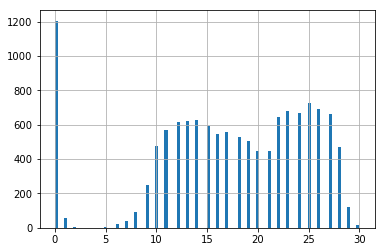

In [20]:
submission['unidades_pred'].hist(bins=100)
pass

In [21]:
submission[['id_pos','unidades_pred']].to_csv('../data/submissions/sub005.csv', sep=',', index=False, header=False)